<a href="https://colab.research.google.com/github/Avi-a005/IEEE-CS/blob/main/IEEEClub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the necessary Libaries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import struct


In [ ]:

def load_images(file_path):
    with open(file_path, 'rb') as f:
        magic, num, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows, cols)
    return images


def load_labels(file_path):
    with open(file_path, 'rb') as f:
        magic, num = struct.unpack('>II', f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels


images_file = 'images-idx3-ubyte'
labels_file = 'labels-idx1-ubyte'


images = load_images(images_file)
labels = load_labels(labels_file)




In [ ]:

print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Images shape: (60000, 28, 28)
Labels shape: (60000,)


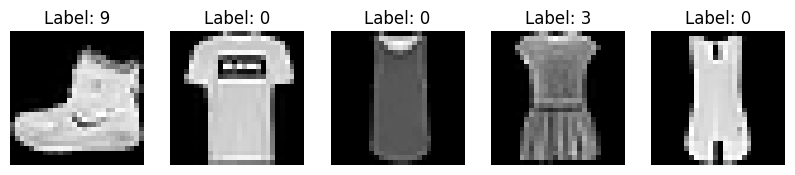

In [ ]:

def display_images(images, labels, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

display_images(images, labels)



In [ ]:

print("Pixel values of first image:")
print(images[0])

Pixel values of first image:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0  

**Level 1: Exploratory Data Analysis**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import struct
import pandas as pd


Images shape: (60000, 28, 28)
Labels shape: (60000,)


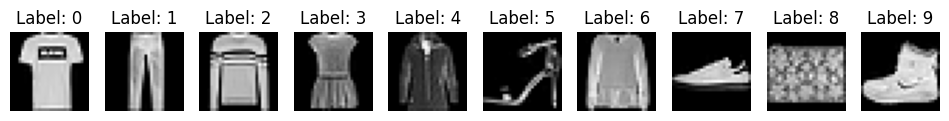

In [ ]:

print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


def display_sample_images(images, labels):
    unique_labels = np.unique(labels)
    plt.figure(figsize=(12, 6))
    for i, label in enumerate(unique_labels):
        idx = np.where(labels == label)[0][0]
        plt.subplot(1, len(unique_labels), i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f"Label: {label}")
        plt.axis('off')
    plt.show()

display_sample_images(images, labels)




Summary Statistics for Pixel Values:
count    4.704000e+07
mean     7.294035e+01
std      9.002118e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.630000e+02
max      2.550000e+02
dtype: float64


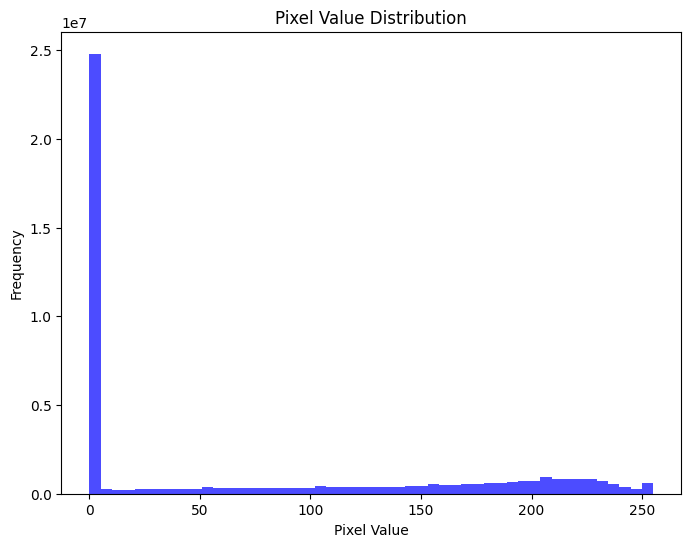

In [ ]:

pixel_values = images.reshape(-1)
summary_stats = pd.Series(pixel_values).describe()
print("\nSummary Statistics for Pixel Values:")
print(summary_stats)


plt.figure(figsize=(8, 6))
plt.hist(pixel_values, bins=50, color='blue', alpha=0.7)
plt.title("Pixel Value Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


**Level 2: Basic Classification Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import shap

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 84.26%

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1202
           1       0.96      0.96      0.96      1219
           2       0.76      0.74      0.75      1205
           3       0.82      0.86      0.84      1184
           4       0.75      0.78      0.76      1202
           5       0.93      0.94      0.93      1211
           6       0.64      0.58      0.61      1218
           7       0.91      0.92      0.92      1159
           8       0.93      0.90      0.92      1197
           9       0.94      0.93      0.94      1203

    accuracy                           0.84     12000
   macro avg       0.84      0.84      0.84     12000
weighted avg       0.84      0.84      0.84     12000



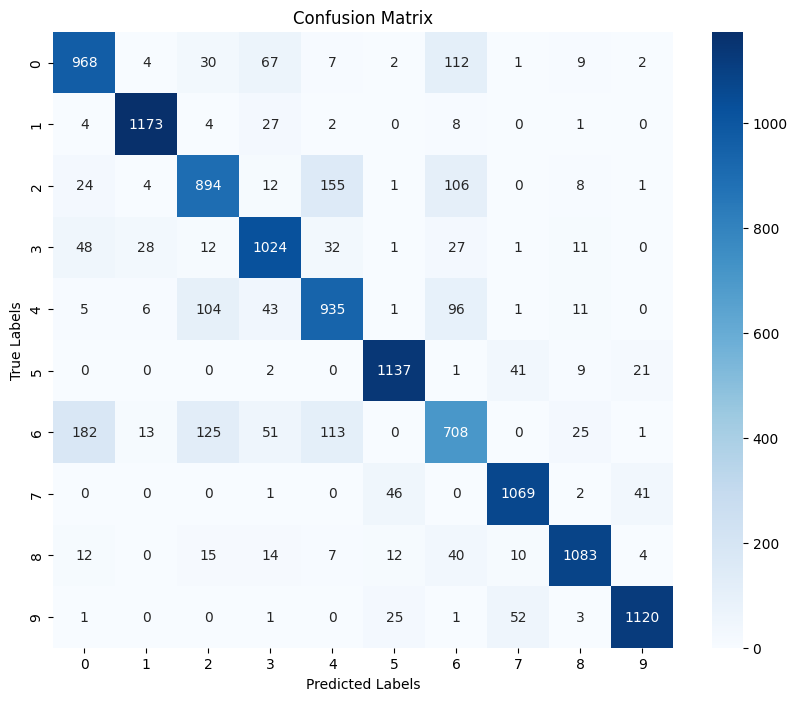

In [ ]:

flattened_images = images.reshape(images.shape[0], -1)


normalized_images = flattened_images / 255.0


scaler = StandardScaler()
standardized_images = scaler.fit_transform(normalized_images)


X_train, X_test, y_train, y_test = train_test_split(standardized_images, labels, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

**Level 3: Neural Network Implementation**

In [ ]:
pip install shap lime matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0afb46d4646bf36de576ee616d3aceaa34309387851ef005444e36fe37b1f364
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


Accuracy: 56.50%

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.47      0.51        96
           1       0.57      0.65      0.61       104

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.56      0.56      0.56       200



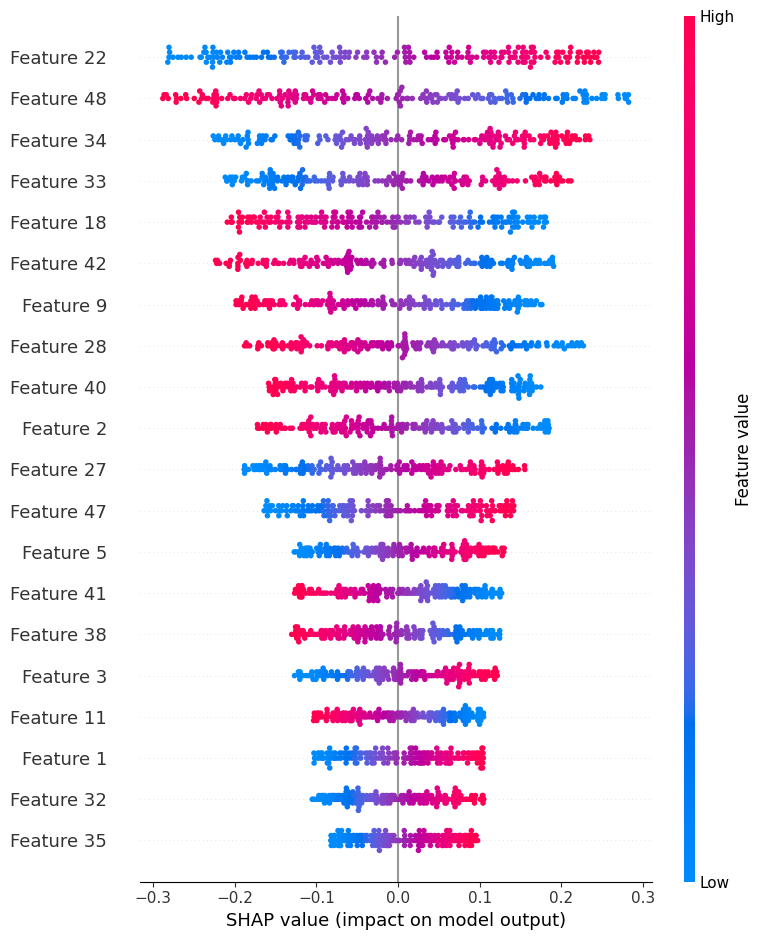

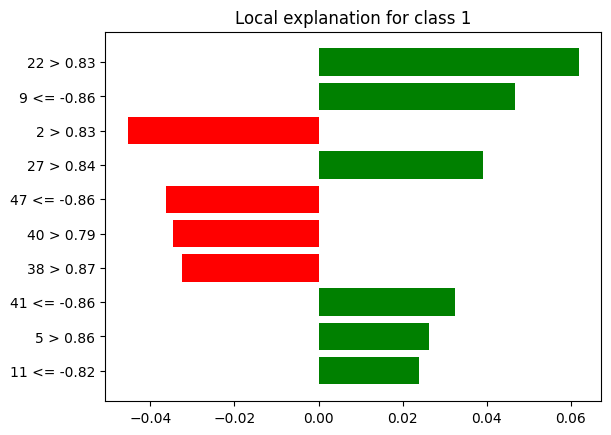

In [ ]:
import shap
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

num_samples = 1000
num_features = 50
X = np.random.rand(num_samples, num_features)
y = np.random.randint(0, 2, num_samples)


scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)


shap.summary_plot(shap_values, X_test)


lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode="classification")


idx = 0
exp = lime_explainer.explain_instance(X_test[idx], model.predict_proba)

exp.show_in_notebook()
exp.as_pyplot_figure()
plt.show()


**Level 4**

In [ ]:
import struct
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split


In [ ]:
def load_images(file_path):
    with open(file_path, 'rb') as f:
        magic, num, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows, cols)
    return images


def load_labels(file_path):
    with open(file_path, 'rb') as f:
        magic, num = struct.unpack('>II', f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels


images_file = 'images-idx3-ubyte'
labels_file = 'labels-idx1-ubyte'


images = load_images(images_file)
labels = load_labels(labels_file)

print(f"Loaded images shape: {images.shape}")
print(f"Loaded labels shape: {labels.shape}")


Loaded images shape: (60000, 28, 28)
Loaded labels shape: (60000,)


In [ ]:

images = images / 255.0

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, Labels: {y_val.shape}")


Training set shape: (48000, 28, 28), Labels: (48000,)
Validation set shape: (12000, 28, 28), Labels: (12000,)


In [ ]:

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7674 - loss: 0.6693 - val_accuracy: 0.8334 - val_loss: 0.4560
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8597 - loss: 0.3894 - val_accuracy: 0.8618 - val_loss: 0.3803
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8747 - loss: 0.3415 - val_accuracy: 0.8607 - val_loss: 0.3921
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8809 - loss: 0.3211 - val_accuracy: 0.8717 - val_loss: 0.3665
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8895 - loss: 0.2983 - val_accuracy: 0.8754 - val_loss: 0.3498
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8941 - loss: 0.2845 - val_accuracy: 0.8802 - val_loss: 0.3358
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9004 - loss: 0.2654 - val_accuracy: 0.8783 - val_loss: 0.3429
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9058 - loss: 0.2545 -

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8849 - loss: 0.3362
Validation Accuracy: 88.50%


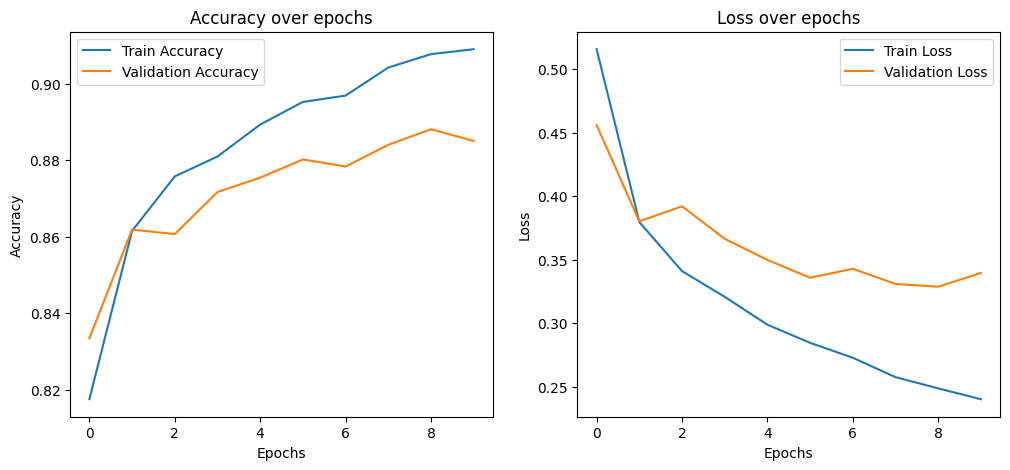

In [ ]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over epochs')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over epochs')

plt.show()


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


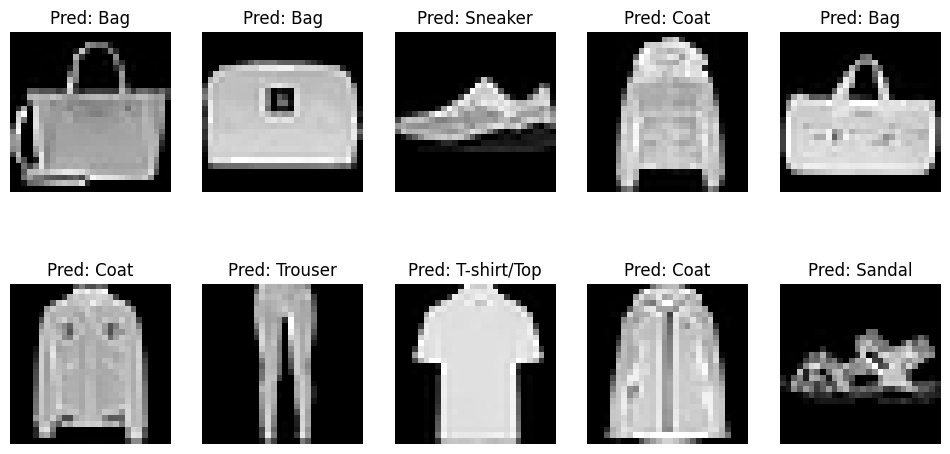

In [ ]:
predictions = model.predict(X_val)

predicted_labels = np.argmax(predictions, axis=1)

class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]


plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_val[i], cmap='gray')
    plt.title(f"Pred: {class_names[predicted_labels[i]]}")
    plt.axis("off")
plt.show()


In [ ]:
# This is final

# The End
**The End**